## Gradient Descent Implementation

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error. Once machine learning models are optimized for accuracy, they can be powerful tools for artificial intelligence (AI) and computer science applications. 

### How does gradient descent work?
Before we dive into gradient descent, it may help to review some concepts from linear regression. You may recall the following formula for the slope of a line, which is y = mx + b, where m represents the slope and b is the intercept on the y-axis.

You may also recall plotting a scatterplot in statistics and finding the line of best fit, which required calculating the error between the actual output and the predicted output (y-hat) using the mean squared error formula. The gradient descent algorithm behaves similarly, but it is based on a convex function, such as the one below:

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG_0.png)

The starting point is just an arbitrary point for us to evaluate the performance. From that starting point, we will find the derivative (or slope), and from there, we can use a tangent line to observe the steepness of the slope. The slope will inform the updates to the parameters—i.e. the weights and bias. The slope at the starting point will be steeper, but as new parameters are generated, the steepness should gradually reduce until it reaches the lowest point on the curve, known as the point of convergence.   

Similar to finding the line of best fit in linear regression, the goal of gradient descent is to minimize the cost function, or the error between predicted and actual y. In order to do this, it requires two data points—a direction and a learning rate. These factors determine the partial derivative calculations of future iterations, allowing it to gradually arrive at the local or global minimum (i.e. point of convergence). More detail on these components can be found below:

![](https://1.cms.s81c.com/sites/default/files/2020-10-27/Learning%20Rate.jpg)

- **Learning rate**  (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.
High and low learning rates
- **The cost (or loss) function** measures the difference, or error, between actual y and predicted y at its current position. This improves the machine learning model's efficacy by providing feedback to the model so that it can adjust the parameters to minimize the error and find the local or global minimum. It continuously iterates, moving along the direction of steepest descent (or the negative gradient) until the cost function is close to or at zero. At this point, the model will stop learning. Additionally, while the terms, cost function and loss function, are considered synonymous, there is a slight difference between them. It’s worth noting that a loss function refers to the error of one training example, while a cost function calculates the average error across an entire training set.


### Types of Gradient Descent
There are three types of gradient descent learning algorithms: batch gradient descent, stochastic gradient descent and mini-batch gradient descent.

- **Batch gradient descent**
Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch. While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.

- **Stochastic gradient descent**
Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

- **Mini-batch gradient descent**
Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

### Challenges with gradient descent
While gradient descent is the most common approach for optimization problems, it does come with its own set of challenges. Some of them include:

- **Local minima and saddle points**
For convex problems, gradient descent can find the global minimum with ease, but as nonconvex problems emerge, gradient descent can struggle to find the global minimum, where the model achieves the best results. Recall that when the slope of the cost function is at or close to zero, the model stops learning. A few scenarios beyond the global minimum can also yield this slope, which are local minima and saddle points. Local minima mimic the shape of a global minimum, where the slope of the cost function increases on either side of the current point. However, with saddle points, the negative gradient only exists on one side of the point, reaching a local maximum on one side and a local minimum on the other. Its name inspired by that of a horse’s saddle. Noisy gradients can help the gradient escape local minimums and saddle points.Diagram of local minimum and saddle point
 
![](https://1.cms.s81c.com/sites/default/files/2020-10-27/Local%20Minimum_SaddlePoints.jpg)


- **Vanishing and Exploding Gradients**
In deeper neural networks, particular recurrent neural networks, we can also encounter two other problems when the model is trained with gradient descent and backpropagation. 
    - **Vanishing gradients**: This occurs when the gradient is too small. As we move backwards during backpropagation, the gradient continues to become smaller, causing the earlier layers in the network to learn more slowly than later layers. When this happens, the weight parameters update until they become insignificant—i.e. 0—resulting in an algorithm that is no longer learning.
    - **Exploding gradients**: This happens when the gradient is too large, creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as $NaN$. One solution to this issue is to leverage a dimensionality reduction technique, which can help to minimize complexity within the model.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (18, 12)

from urllib.request import urlretrieve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import r2_score

## Gradient Descent for Regression

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f11e7b4a090>)

In [3]:
medical_df = pd.read_csv('medical.csv')
medical_df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_df.shape

(1338, 7)

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

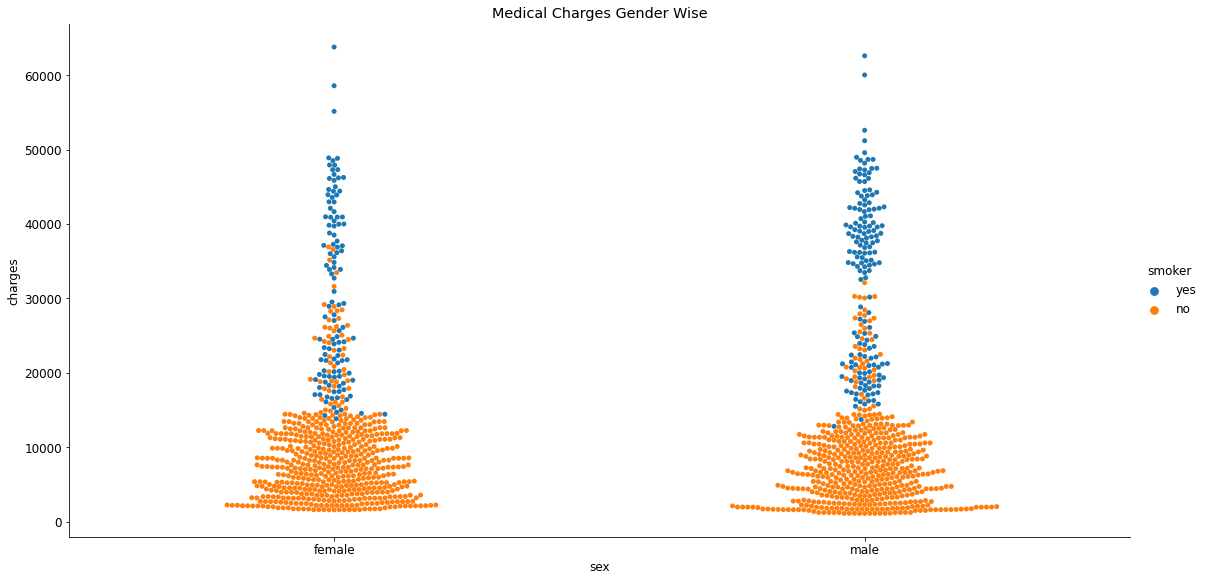

In [7]:
sns.catplot(data=medical_df,x= 'sex',y='charges', kind='swarm', hue='smoker', aspect =2, height=8)
plt.title('Medical Charges Gender Wise')
plt.show()

From the plot above, we could see male smokers are likely to spend more on insurance charges.

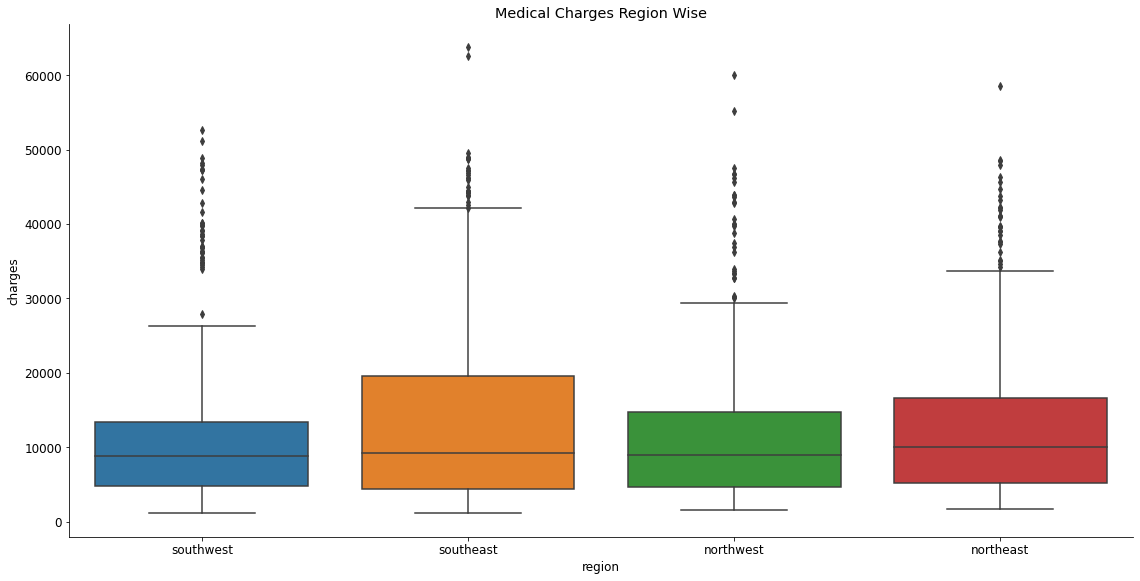

In [8]:
sns.catplot(data=medical_df,x= 'region',y='charges', kind='box', aspect =2, height=8)
plt.title('Medical Charges Region Wise')
plt.show()

People from the southeast region incur insurance charges more followed by northeast and southeast.

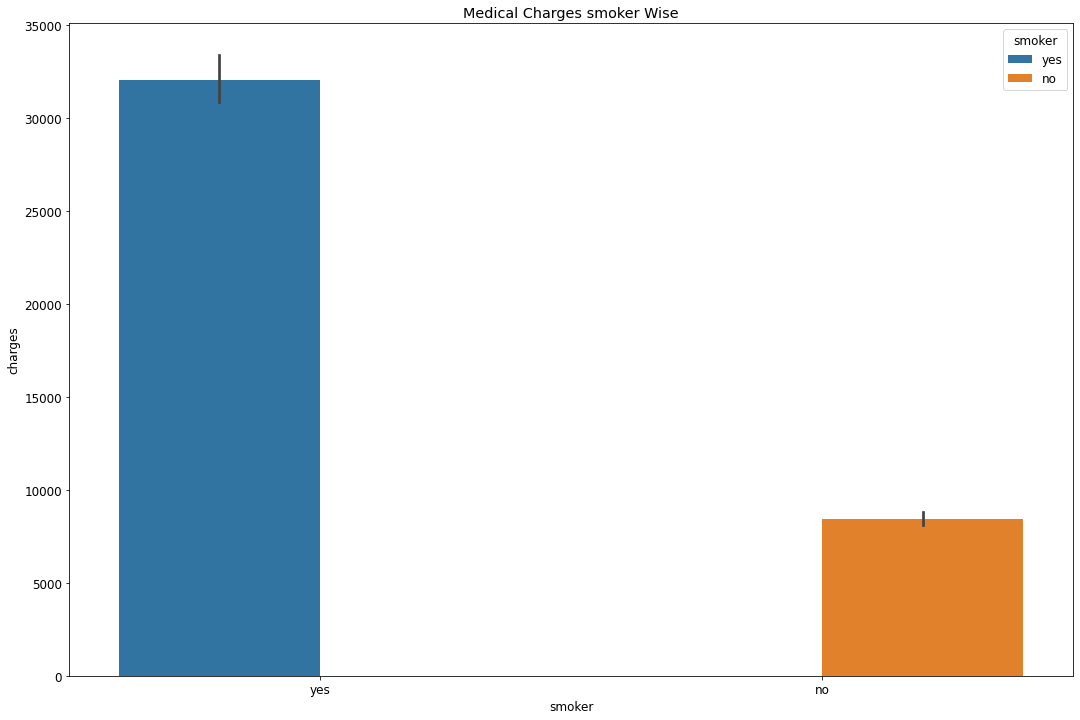

In [9]:
sns.barplot(data=medical_df,x= 'smoker',y='charges', hue='smoker')
plt.title('Medical Charges smoker Wise')
plt.show()

Smokers end up paying more insurance charges than the ones who don't smoke.

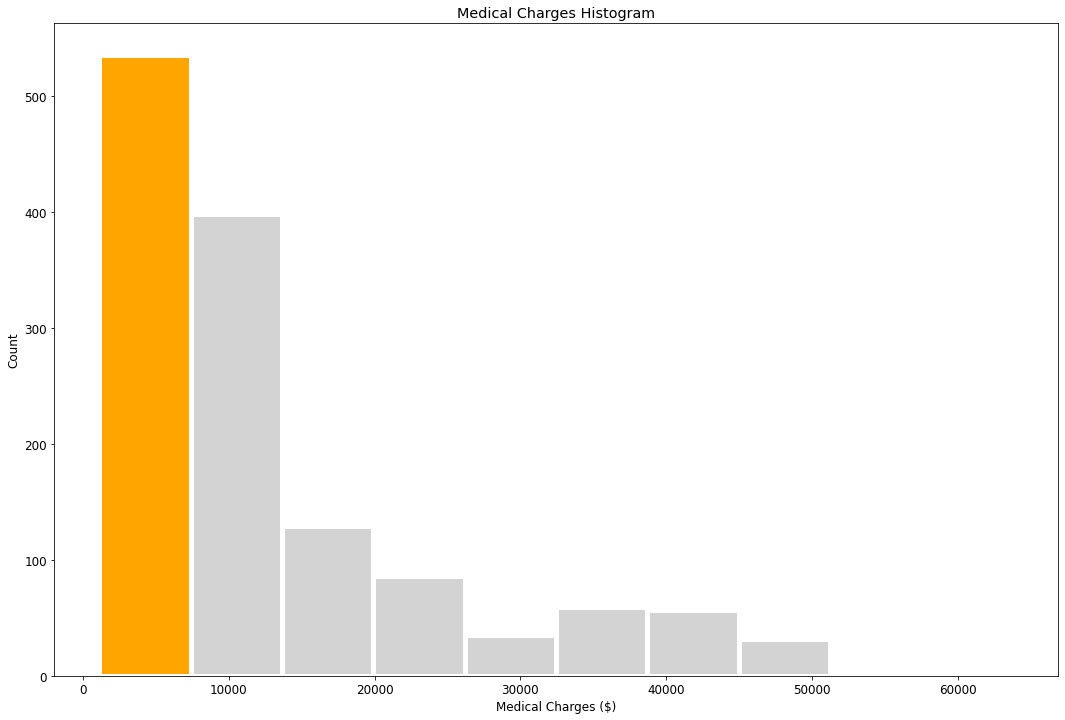

In [10]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(np.array(medical_df.charges), edgecolor='white', color='lightgray',linewidth=5)
for i in range(0,1):
    patches[i].set_facecolor('orange')
    plt.title('Medical Charges Histogram')
    plt.xlabel('Medical Charges ($)')
    plt.ylabel('Count')
    plt.show()

Most of the people pay insurance charges within the range of 0 to 7k USD.

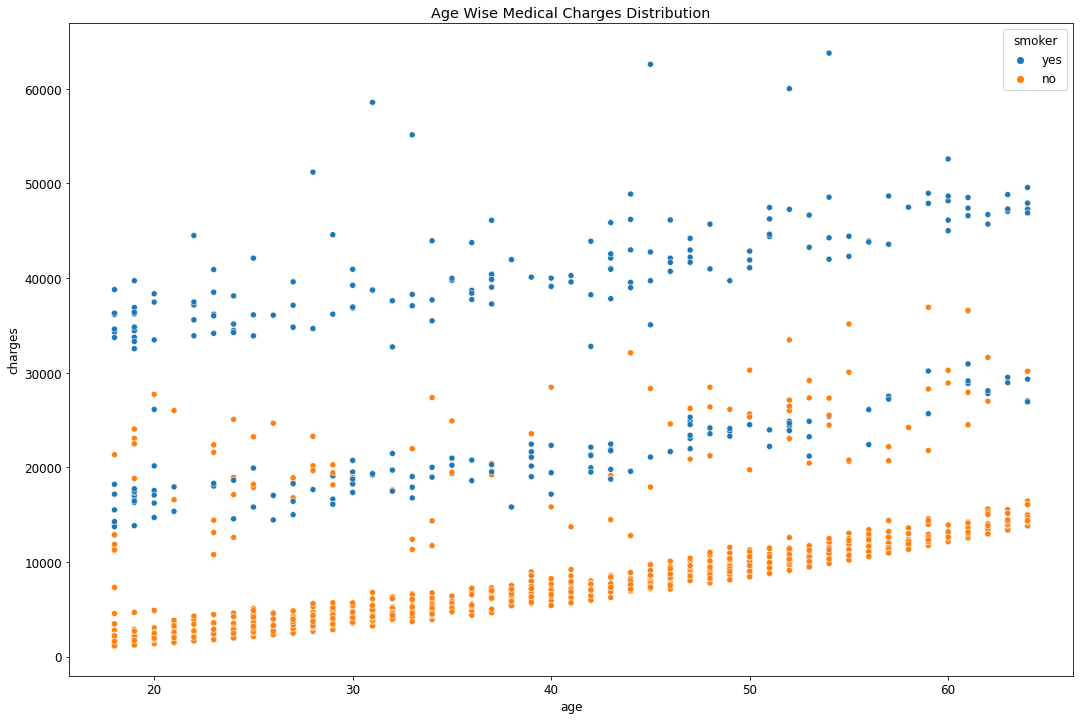

In [11]:
sns.scatterplot(y=medical_df['charges'], x=medical_df['age'], hue=medical_df['smoker'])
plt.title('Age Wise Medical Charges Distribution')
plt.show()

If someone who is in his later years of life and is a smoker, chances are they may end up spending a nice amount on Medical Charges as opposed to the ones who are elderly and don't smoke.

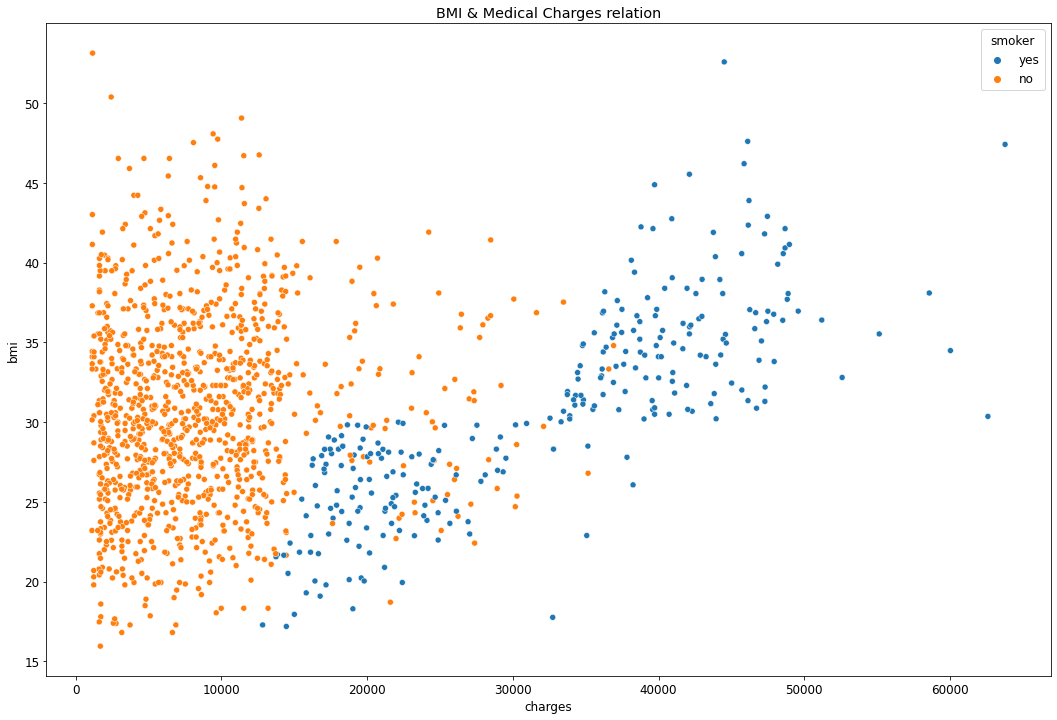

In [12]:
sns.scatterplot(y=medical_df['bmi'], x=medical_df['charges'], hue=medical_df['smoker'])
plt.title('BMI & Medical Charges relation')
plt.show()

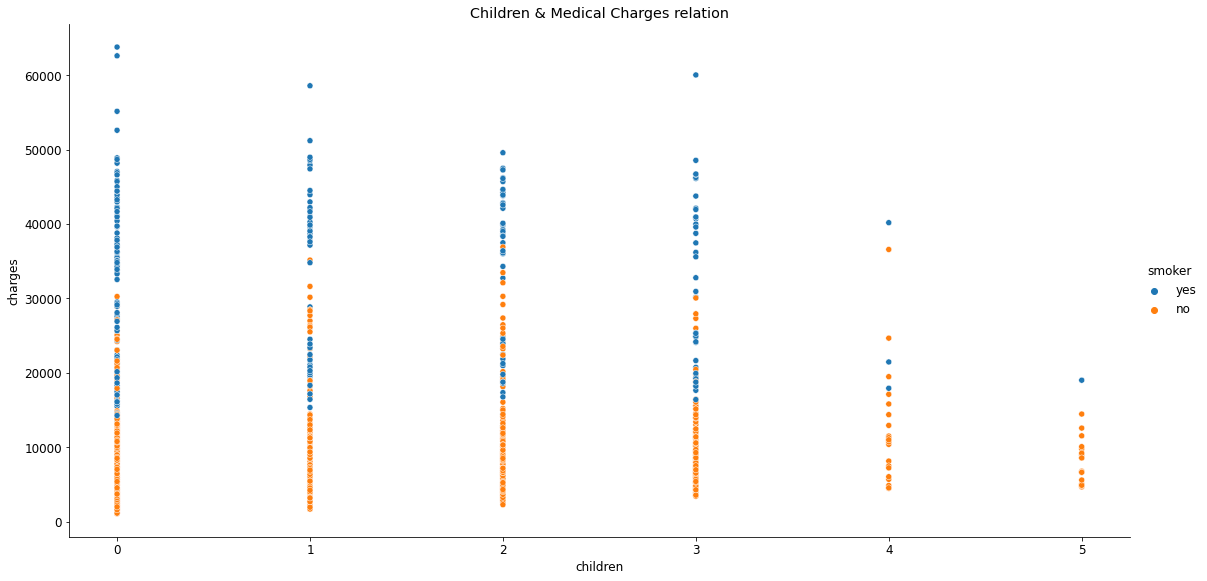

In [13]:
sns.relplot(x=medical_df['children'], y=medical_df['charges'], hue=medical_df['smoker'], aspect = 2, height=8)
plt.title('Children & Medical Charges relation')
plt.show()

People with 0, 1 or 3 children are likely to spend more on Medical Charges.

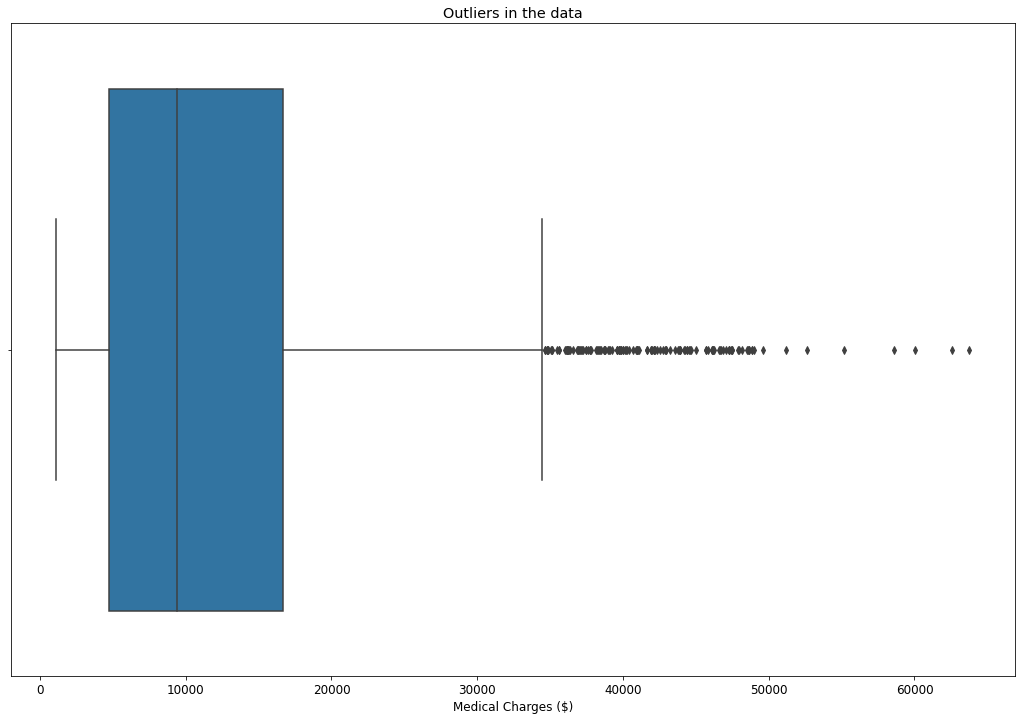

In [14]:
sns.boxplot(x=medical_df['charges'])
plt.title('Outliers in the data')
plt.xlabel('Medical Charges ($)')
plt.show()

### Data Preprocessing

### Outlier Detection And Removal

What is an outlier exactly? It’s a data point that is significantly different from other data points in a data set. While this definition might seem straightforward, determining what is or isn’t an outlier is actually pretty subjective, depending on the study and the breadth of information being collected.

A histogram is the best way to visualize univariate (single variable) data to find outliers. A histogram divides the range of values into various groups, and then shows how many times the data falls into each group on a bar chart. Arrange the data groups sequentially, and it should be easy to spot outliers on either the far left or far right sides of the histogram.

For multivariate data, scatterplots can be very effective. Scatterplots show a collection of data points, where the x-axis (horizontal) represents the independent variable and the y-axis (vertical) represents the dependent variable. 

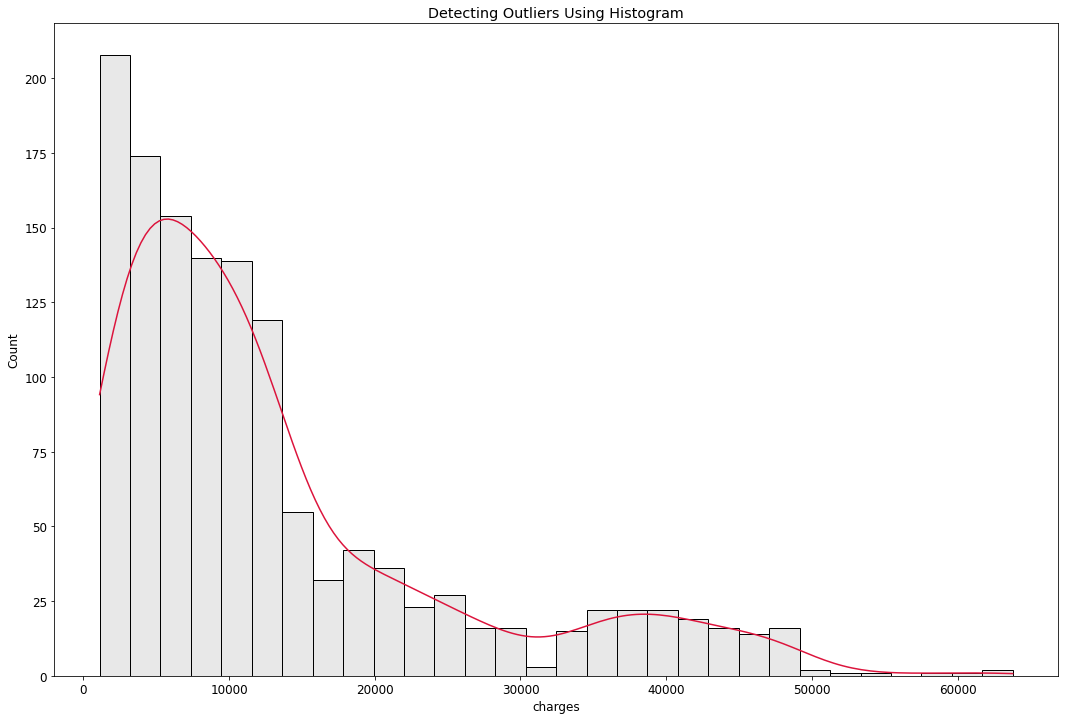

In [15]:
ax = sns.histplot(medical_df['charges'], kde=True, color='lightgray')
ax.lines[0].set_color('crimson')
plt.title('Detecting Outliers Using Histogram')
plt.show()

In [16]:
data = sorted(medical_df['charges'].values)
data_mean, data_std = np.mean(data), np.std(data)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('Lower =', lower)
print('Upper =', upper)

Lower = -23046.032661543577
Upper = 49586.87719182609


In [17]:
medical_df = medical_df[medical_df['charges'] < upper]
medical_df = medical_df[medical_df['charges'] > lower]
print('The shape of our dataframe after the Outlier Removal is', medical_df.shape)

The shape of our dataframe after the Outlier Removal is (1331, 7)


Making a copy of the original dataframe to ensure the original data stays intact.

In [18]:
df = medical_df.copy()

### OneHotEncoding and Scaling

### OneHotEncoding

![](https://i.imgur.com/n8GuiOO.png)

Read More on Encoding data https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [19]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_cols = df.select_dtypes(include='object').columns
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [20]:
onehot =encoder.transform(df[cat_cols])
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [21]:
encoded_cols = [['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']]
df[['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']] = onehot
df.drop(cat_cols, axis=1, inplace=True )

In [22]:
df.head()

,age,bmi,children,charges,female,male,smokerno,smokeryes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Scaling the data

![](https://miro.medium.com/max/1100/1*EszcmFua2fp03c5Kfj7OAA.png)

Scaling is done to help the model with the faster convergence. The only difference between the plots is the scale of feature $x$. Its range was originally [0, 1], then its converted into [0, 10], and then the scaler made it into [-1.5, 1.5]. You can perform scaling by these two methods

1. Normalization = $ \frac {x- min(x)}  {max(x)-min(x)}$
2. Standardization = $ \frac {x - \bar{x}}  {\sigma} $

In [23]:
scaler = MinMaxScaler()
df[['age', 'bmi', 'children', 'charges', 'female', 'male', 'smokerno',
    'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']] = scaler.fit_transform(df)
df.head()

,age,bmi,children,charges,female,male,smokerno,smokeryes,northeast,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.325308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.012458,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.068673,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.430549,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.056649,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Splitting the Data

In [24]:
y = df['charges'].values
df.drop('charges', axis=1, inplace=True)
X = df.values

In [25]:
print('The shape of our independent variables data is',X.shape)
print('The shape of our target variable data is',y.shape)

The shape of our independent variables data is (1331, 11)
The shape of our target variable data is (1331,)


Loss for regression would be `Mean Squared Error` which is mathemtically $ (y-\hat{y})^2$ and the derivative of the same would be $ 2 *  (y-\hat{y}) $ using the chain rule of Calculus. The derivatives have changed to what they are in the loop when we differentiate them $w.r.t$ to the learnable parameters.

In [26]:
#Function For EarlyStopping
def EarlyStopping(loss):
    for i in range(1, len(loss)):
        yield (loss[i-1], loss[i])

#Creation of Batches
def batch_size(batchsize, X):
    batches = round(X.shape[0]//batchsize)
    return batches

In [27]:
N = X.shape[0]
learning_rate=0.3
decay_rate =  0.001
LR = []
loss = []
batchsize = 100
Intercept = []
Slope = []
m=np.ones(X.shape[1])                  #initializing some values of slope
b=1                                     #initializing some values of intercept
print('The initial Value of w and b are', m, b)
batches = batch_size(batchsize, X)

for i in range(1000):
    epoch = i
    for j in range(batches):
        if i==0:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = learning_rate
                yhat = np.dot(X,m) + b                                 #Predictions
                MSE = (np.sum((y-yhat)**2))/N                           #Error 
                r_squared = r2_score(y,yhat)
                loss_slope_b = -(2/N)*sum(y-yhat)                     #wrt to b aka intercept
                loss_slope_m = -(2/N)*(np.dot((y - yhat),X))          #wrt to the slope of the line
                m = m - (learning_rate*loss_slope_m)
                b = b - (learning_rate*loss_slope_b)
            else:
                m = m
                b = b
                
        else:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = [(1/(1+decay_rate))* learning_rate for j in range(batches)][0]
                yhat = np.dot(X,m) + b                                #Predictions
                MSE = (np.sum((y-yhat)**2))/N                         #Error 
                r_squared = r2_score(y,yhat)
                loss_slope_b = -(2/N)*sum(y-yhat)                     #wrt to b aka intercept
                loss_slope_m = -(2/N)*(np.dot((y - yhat),X))          #wrt to the slope of the line
                m = m - (learning_rate*loss_slope_m)
                b = b - (learning_rate*loss_slope_b)
            else:
                m = m
                b = b         
    Intercept.append(b)
    Slope.append(m)
    loss.append(MSE)
    LR.append(learning_rate)
    
    if i % 100 == 0:
        print('===> Epoch:',i,' Loss: ',MSE ,  ' Learning Rate: ', learning_rate, '  R-Squared:  ', round(r_squared,4))
    
    #Early Stopping Mechanism
    for prev, curr  in EarlyStopping(loss):
        if prev - curr < 1e-6:
            print(f'Early Stopping at Epoch {i} with Loss {np.around(MSE,5)} and R-Squared {np.around(r_squared,5)}')
            break                  #Inner Loop Break
    else: 
        continue                   # executed if the inner loop did NOT break
    break                          # executed if the inner loop DID break
print('The final estimates of w and b are',m, b)

The initial Value of w and b are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1
===> Epoch: 0  Loss:  23.50357314884502  Learning Rate:  0.3   R-Squared:   -402.485
===> Epoch: 100  Loss:  0.014430727670120862  Learning Rate:  0.2714647892693368   R-Squared:   0.7523
Early Stopping at Epoch 111 with Loss 0.01442 and R-Squared 0.75252
The final estimates of w and b are [ 0.24066105  0.26311004  0.06696829  0.14802851  0.14537717 -0.09296806
  0.38637374  0.58677093  0.57736753  0.5639756   0.56529163] -0.7065943214872349


In [28]:
coefficient  = (Slope[epoch])
intercept = (Intercept[epoch])
y_pred = np.dot(X, coefficient)+intercept      #Predictions
df = pd.DataFrame(y_pred, y, columns=['y']).reset_index().rename(columns = {'index':'y','y':'y_pred'})

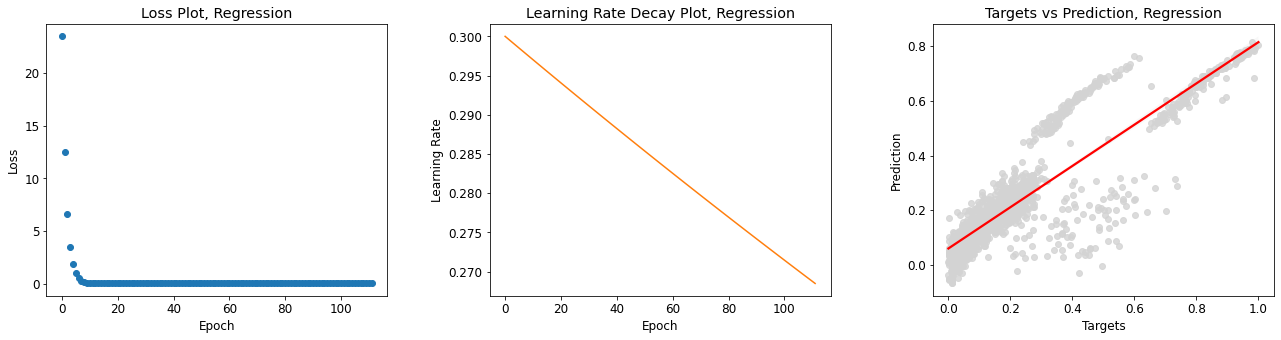

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,5))
fig.subplots_adjust(hspace = .2, wspace=.3)

#First Plot
ax1.scatter(y=loss,x=range(epoch+1))
ax1.set_title("Loss Plot, Regression")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

#third Plot
ax3 = sns.regplot(data=df, x=df['y'],y=df['y_pred'], color='lightgrey')
ax3.lines[0].set_color('red')
ax3.set_title('Targets vs Prediction, Regression')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Prediction')

#second plot
ax2.plot(LR, 'tab:orange')
ax2.set_title("Learning Rate Decay Plot, Regression")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate')

plt.show()

By Implementing a Mini-Batch Gradient Descent we have been able to accomplish the same results in lesser epochs. This concept really helps when we have large amounts of data to work with.

## Gradient Descent for Classification

We use logistic regression to solve classification problems where the outcome is a discrete variable. Usually, we use it to solve binary classification problems. As the name suggests, binary classification problems have two possible outputs. We utilize the sigmoid function (or logistic function) to map input values from a wide range into a limited interval. 

![](https://www.baeldung.com/wp-content/uploads/sites/4/2021/01/log-reg-sigmoid.png)

The Sigmoid Function formula represents the probability of observing the output $y = 1$ of a Bernoulli random variable. This variable is either 1 or 0. In linear regression, we use mean squared error (MSE) as the cost function. But in logistic regression, using the mean of the squared differences between actual and predicted outcomes as the cost function might give a wavy, non-convex solution; containing many local optima

![](https://www.baeldung.com/wp-content/uploads/sites/4/2021/01/log-reg-sse_cost.png)



In [30]:
#Loading the Data
data = load_breast_cancer()
cancerdf = pd.DataFrame(data=data.data, columns=data.feature_names)
cancerdf['target'] = data.target
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
cancerdf.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [32]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Exploratory Data Analysis

In [33]:
fig = px.histogram(cancerdf, 
                   x='mean area', 
                   marginal='violin', 
                   text_auto=True,
                   color_discrete_sequence=['royalblue'], 
                   template='simple_white',
                   labels={"mean area": "Mean Area"},
                   title='Cancer Mean Area Distribution')

fig.update_layout(xaxis_title="Mean Area",yaxis_title="Count", bargap=0.1, hovermode="x")

fig.show()

In [34]:
fig = px.scatter(cancerdf, 
                x='mean texture', 
                color='target',
                size='mean texture',
                template='simple_white', 
                title='Cancer Mean Texture Spread',
                labels={"mean texture": "Mean Texture", "target":"Target", 'index': " "},
                hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ", hovermode="x")

fig.show()

In [35]:
fig = px.histogram(cancerdf,
                 x="worst area", 
                 color_discrete_sequence=['royalblue'],
                 marginal='box',
                 text_auto=True, 
                 hover_data=["target"],
                 nbins=10,
                 template="simple_white", 
                 labels={"worst area": "Worst Area"},
                 title="Worst Area Distribution")

fig.update_layout(xaxis_title="worst area",yaxis_title="Count", bargap=0.1, hovermode="x")

fig.show()

In [36]:
fig = px.scatter(cancerdf,
                 x="symmetry error", 
                 size='symmetry error',
                 color = 'symmetry error',
                 hover_data=["target"],
                 template="seaborn", 
                 labels={"symmetry error": "Symmetry Error"},
                 title="Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ", hovermode="x")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [37]:
fig = px.scatter(cancerdf,
                 x="mean concave points", 
                 size='mean concave points',
                 color="mean concave points", 
                 hover_data=["target"],
                 template="simple_white", 
                 labels={"mean concave points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ", hovermode="x")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [38]:
fig = px.histogram(cancerdf, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count", hovermode="x")

fig.show()

### Data Pre-Processing

In [39]:
input_cols = cancerdf.columns[:-1]
input_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [40]:
target_col =  cancerdf.columns[-1]
target_col

'target'

In [41]:
inputs_df = cancerdf[list(input_cols)].copy()
inputs_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
targets = cancerdf[(target_col)]
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [43]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Dimensionality Reduction

The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called dimensionality reduction. **Dimensionality reduction** technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.

A dataset contains a huge number of input features in various cases, which makes the predictive modeling task more complicated. Because it is very difficult to visualize or make predictions for the training dataset with a high number of features, for such cases, dimensionality reduction techniques come in handy. 

![](https://miro.medium.com/max/959/1*kK4aMPHQ89ssFEus6RT4Yw.jpeg)

Some common feature extraction techniques are:

1. Principal Component Analysis
2. Linear Discriminant Analysis
3. Kernel PCA
4. Quadratic Discriminant Analysis

In [44]:
#Fetching the Column Values 
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [45]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))): 
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        break
        
fig = px.line(x=explained_variance, y=range(1,len(explained_variance)+1),
              template='simple_white',markers=True,
              text=[ '%.3f' % elem for elem in explained_variance ],
              labels = dict(y='PCs', x='Explained Variance', text= 'Explained Variance'),
              color_discrete_sequence=['steelblue'],
              title = 'Explained Variance Plot')

fig.update_traces(textposition="top left")

fig.update_layout(xaxis_title="Explained Variance",yaxis_title="Count of Principal Components", hovermode="x")
    
fig.show()

In [46]:
pc = eigen_vectors[0:6]
transformed_df = np.dot(cancerdf.iloc[:,0:30],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6'])
new_df['Target'] = cancerdf['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Target
0,-520.188331,68.360773,-583.967183,965.938950,-125.514544,107.218277,0
1,-472.002225,63.725168,-560.812348,962.732088,-92.886364,112.571279,0
2,-426.933982,62.458621,-484.250303,842.866511,-99.523851,102.491067,0
3,-184.853863,44.017546,-136.342174,277.754370,-30.916892,38.412925,0
4,-394.181870,60.226364,-429.655025,790.215736,-105.788586,95.896057,0


In [47]:
new_df['Target'] = new_df['Target'].astype('str')
fig = px.scatter(
                 data_frame= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
                 template='simple_white',
                 color=new_df['Target'],
                 labels = dict(target="Target"),
                 title = 'Top Principal Components after Linear Transformation',
                 color_discrete_sequence=px.colors.qualitative.G10, 
                 hover_data=["PC1", "PC2"]
                )

fig.update_layout(xaxis_title="PC1",yaxis_title="PC2", hovermode="x")
    
fig.show()

In [48]:
fig = px.scatter(
                 data_frame= new_df,
                 x=new_df['PC5'],
                 y=new_df['PC6'],
                 template='simple_white',
                 color=new_df['Target'],
                 labels = dict(target="Target"),
                 title = 'Bottom Principal Components after Linear Transformation',
                 color_discrete_sequence=px.colors.qualitative.G10, 
                 hover_data=["PC5", "PC6"]
                )

fig.update_layout(xaxis_title="PC5",yaxis_title="PC6", hovermode="x")
    
fig.show()

### Splitting the data

In [49]:
X = new_df.iloc[:,0:-1].values
new_df['Target'] = new_df['Target'].astype('int32')
y = new_df.iloc[:,-1].values

We will be using Sigmoid function here to predict the output. The formula for sigmoid is $ S({x}) = \frac {1}{(1+e^{-x})}$ . We first of all calculate the probabilities using `Log Loss` and then pass the value to the sigmoid function which classifies it into either 0 or 1. The formula for the log_loss is as follows:-

$$ L = \frac {-1}{n} * \Sigma\: [y_{i} log {y_i} + (1-y_{i})  x log({1-y_i})] $$ 

The formula is also sometimes referred to as `Binary Cross Entropy` because we first of all take the maximum likelihood but then when we take the values of the maximum likelihood by multiplying the probabilities the result value is too small which becomes invalid so we then take log values of the probabilities but the issue there is the log value of a lower number is higher and its higher for a lower number. 

To mitigate this we use the negative sign and to take all values into consideration, there are 2 terms i.e for the positive and the negative outcome so the formula can handle both the cases so we will have to choose the model that has the lowest loss value. Since there is no closed form of this formula, we would have to rely on Gradient Descent to find out the values where the loss is the minimum.

The derivative of the log loss will be the following using which we will update our weights to get to the minima.

$$ \frac {d}{dx} = \frac {-1} {m} * (y-\hat{y}) * x $$ 

In [50]:
#initializing random Parameters
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

#Sigmoid Function
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

#Cost Calculation
def cost( y, y_hat):
        return - np.sum((np.dot(y.T,np.log(y_hat)))+ (np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

#Updating Parameters
def update_params (b_0, w_0 , y , y_hat, X_new, alpha):
    decay_rate = 0.1
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
    return b_0,w_0 

In [51]:
epoch = 0
learning_rate = 0.0001
LearningRate = []
all_costs = []
Accuracy = []
batchsize = 10
decay_rate =  0.01
b,w = initialize_betas(X.shape[1])
print('The initial Value of w and b are', w, b)
batches = batch_size(10, X)
for i in range(2000):
    epoch = i
    
    for j in range(batches):
        if i==0:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = learning_rate
                y_hat = sigmoid(b, w , X)
                current_cost = cost(y, y_hat)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y, y_hat, X, learning_rate)
                y_pred = [1 if i>0.5 else 0 for i in y_hat]
                accuracy = round(len(y[y==y_pred])/y.shape[0]*100,4)
            else:
                #Not training the Parameters if the above condition is not met
                prev_w = prev_w
                prev_b = prev_b
                
        else: #Decaying the Learning Rate if its not the first iteration
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = [(1/(1+decay_rate))* learning_rate for j in range(batches)][0]
                y_hat = sigmoid(b, w , X)
                current_cost = cost(y, y_hat)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y, y_hat, X, learning_rate)
                y_pred = [1 if i>0.5 else 0 for i in y_hat]
                accuracy = round(len(y[y==y_pred])/y.shape[0]*100,4)
                
            else:
                
                #Not training the Parameters if the above condition is not met
                prev_w = prev_w
                prev_b = prev_b
                
    Accuracy.append(accuracy)
    all_costs.append(current_cost)
    LearningRate.append(learning_rate)
    
    if i % 100 == 0:
        print('===> Epoch:',i,' Loss: ',current_cost ,  ' Learning Rate: ', learning_rate, '  Accuracy:  ', accuracy)
    
    #Early Stopping Mechanism
    for prev, curr  in EarlyStopping(all_costs):
        if prev == curr:
            print(f'-- Early Stopping at Epoch {i} with Loss {np.around(current_cost,5)} and Accuracy {np.around(accuracy,4)}--')
            break                  #Inner Loop Break
    else:
        continue                   # executed if the inner loop did NOT break
    break                          # executed if the inner loop DID break
print('The final estimates of w and b are',m, b)

The initial Value of w and b are [0.9111977  0.18866966 0.71041952 0.08556594 0.40668595 0.12880115] 0.08723555957274232
===> Epoch: 0  Loss:  nan  Learning Rate:  0.0001   Accuracy:   37.2583
===> Epoch: 100  Loss:  1.444218013370933  Learning Rate:  2.553734421997803e-07   Accuracy:   63.9719
===> Epoch: 200  Loss:  1.4421870378488462  Learning Rate:  6.521559498096449e-10   Accuracy:   64.1476
===> Epoch: 300  Loss:  1.4421819078303022  Learning Rate:  1.665433097539563e-12   Accuracy:   64.1476
===> Epoch: 400  Loss:  1.4421818947332796  Learning Rate:  4.253073828721211e-15   Accuracy:   64.1476
===> Epoch: 500  Loss:  1.4421818946999498  Learning Rate:  1.0861221035703345e-17   Accuracy:   64.1476
-- Early Stopping at Epoch 510 with Loss 1.44218 and Accuracy 64.1476--
The final estimates of w and b are [ 0.24066105  0.26311004  0.06696829  0.14802851  0.14537717 -0.09296806
  0.38637374  0.58677093  0.57736753  0.5639756   0.56529163] 0.090475242118635


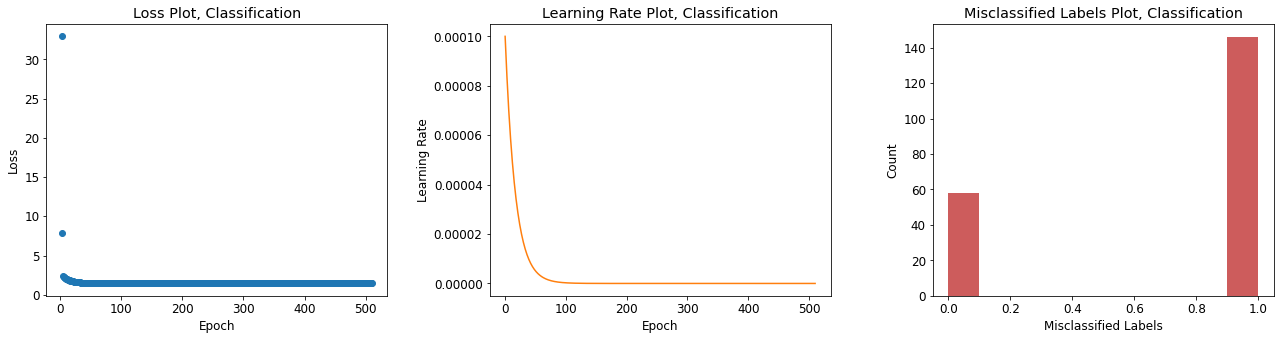

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,5))
fig.subplots_adjust(hspace = .2, wspace=.3)

#First Plot
ax1.scatter(y=all_costs,x=range(epoch+1))
ax1.set_title("Loss Plot, Classification")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

#Second Plot
ax2.plot(LearningRate, 'tab:orange')
ax2.set_title("Learning Rate Plot, Classification")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate')

#Third Plot
ax3.hist(y[y != y_pred], color='indianred')
ax3.set_title("Misclassified Labels Plot, Classification")
ax3.set_xlabel('Misclassified Labels')
ax3.set_ylabel('Count')
plt.show()

There you have it! Gradient Descent Applied from scratch on both Regression and Classification problems in Machine Learning. Thanks for taking out the time to go through the notebook. 

## FURTHER READING

1. Logistic Regression Using Gradient Descent https://bit.ly/3UGv1JL
2. Linear Regression Using Gradient Descent https://bit.ly/2OwHopq
3. Curse Of Dimensionality https://bit.ly/3RerRtZ
4. Gradient Descent - Deep Dive https://bit.ly/3xR8rog